In [2]:
from __future__ import print_function
import numpy as np
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD, Adam 
from keras.utils import np_utils
import matplotlib.pyplot as plt

np.random.seed(1671)  # for reproducibility

# network and training
NB_EPOCH = 2
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10   # number of outputs = number of digits
OPTIMIZER = SGD() # SGD optimizer
N_HIDDEN = 128
VALIDATION_SPLIT = 0.2 # how much TRAIN is reserved for VALIDATION

# data: shuffled and split between train and test sets
#
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test: ", y_test.shape)

class_names = {i:cn for i, cn in enumerate(['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']) }


ModuleNotFoundError: No module named 'keras'

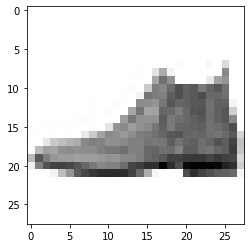

In [23]:
plt.imshow(X_test[0], cmap = plt.cm.binary)
plt.show()

In [1]:
num = 10
images = X_test[:num]
labels = y_test[:num]
num_row = 2
num_col = 5# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i], cmap = plt.cm.binary)
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()

NameError: name 'X_test' is not defined

In [25]:
#X_train is 60000 rows of 28x28 values --> reshaped in 60000 x 784
RESHAPED = 784
#
X_train = X_train.reshape(60000, RESHAPED)
X_test = X_test.reshape(10000, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalize 
#
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES)

print("Y of 2 samples : \n", Y_test[:2])


60000 train samples
10000 test samples
Y of 2 samples : 
 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


In [26]:

# 10 outputs
# final stage is softmax

model = Sequential()
model.add(Dense(NB_CLASSES, input_shape=(RESHAPED,)))
model.add(Activation('softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=OPTIMIZER,
              metrics=['accuracy'])

history = model.fit(X_train, Y_train,
                    batch_size=BATCH_SIZE, epochs=NB_EPOCH,
                    #batch_size=BATCH_SIZE, epochs=100,
                    verbose=VERBOSE, validation_split=VALIDATION_SPLIT)
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 10)                7850      
_________________________________________________________________
activation_11 (Activation)   (None, 10)                0         
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
Train on 48000 samples, validate on 12000 samples
Epoch 1/2
48000/48000 [==============================] - 1s 19us/step - loss: 1.2432 - acc: 0.6139 - val_loss: 0.9009 - val_acc: 0.7114
Epoch 2/2
10000/10000 [==============================] - 0s 13us/step

Test score: 0.7811874876976013
Test accuracy: 0.7407


In [27]:
OPTIMIZER = Adam()
# 10 outputs
# final stage is softmax

model = Sequential()
model.add(Dense(NB_CLASSES, input_shape=(RESHAPED,)))
model.add(Activation('softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=OPTIMIZER,
              metrics=['accuracy'])

history = model.fit(X_train, Y_train,
                    batch_size=BATCH_SIZE, epochs=NB_EPOCH,
                    #batch_size=BATCH_SIZE, epochs=100,
                    verbose=VERBOSE, validation_split=VALIDATION_SPLIT)
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 10)                7850      
_________________________________________________________________
activation_12 (Activation)   (None, 10)                0         
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
Train on 48000 samples, validate on 12000 samples
Epoch 1/2
48000/48000 [==============================] - 1s 23us/step - loss: 0.7819 - acc: 0.7420 - val_loss: 0.5747 - val_acc: 0.8079
Epoch 2/2
10000/10000 [==============================] - 0s 12us/step

Test score: 0.5387159660816193
Test accuracy: 0.8134
